In [9]:
pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import time 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import OneClassSVM

C:\Users\user\AppData\Local\Temp\ipykernel_18872\2390681000.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv('final_data.csv')
print(df.dtypes)

Surrogate Keys        int64
UserID                int64
Gender               object
LocationID            int64
City                 object
State                object
StateCode            object
Country              object
TweetID               int64
Hour                  int64
Day                   int64
Weekday              object
IsReshare              bool
Reach                 int64
RetweetCount          int64
Likes                 int64
Klout                 int64
Sentiment           float64
Lang                 object
text                 object
DateID                int64
LanguageID            int64
TweetLength           int64
WeekdayIndicator       bool
dtype: object


In [3]:
# Detect missing values
missing_values = df.isnull().sum()
print("Missing values in each attribute:\n", missing_values)

Missing values in each attribute:
 Surrogate Keys      0
UserID              0
Gender              0
LocationID          0
City                0
State               0
StateCode           0
Country             0
TweetID             0
Hour                0
Day                 0
Weekday             0
IsReshare           0
Reach               0
RetweetCount        0
Likes               0
Klout               0
Sentiment           0
Lang                0
text                0
DateID              0
LanguageID          0
TweetLength         0
WeekdayIndicator    0
dtype: int64


In [4]:
# Detect duplicates 
duplicates = df.duplicated()
print("Number of duplicate records:", duplicates.sum())
df = df.drop_duplicates()

Number of duplicate records: 0


In [5]:
# Descriptive statistics for numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Numerical attributes
num_desc_stats = numerical_attributes.describe()
print("Descriptive statistics for numerical attributes:\n", num_desc_stats)

# Categorical attributes
cat_freq_dist = categorical_attributes.apply(pd.Series.value_counts)
print("Frequency distribution for categorical attributes:\n", cat_freq_dist)

Descriptive statistics for numerical attributes:
        Surrogate Keys        UserID    LocationID       TweetID          Hour  \
count    98703.000000  98703.000000  98703.000000  98703.000000  98703.000000   
mean     49352.000000  49352.000000   2835.741355  49352.000000     11.422439   
std      28493.246147  28493.246147   1321.680587  28493.246147      6.069131   
min          1.000000      1.000000      1.000000      1.000000      0.000000   
25%      24676.500000  24676.500000   1601.000000  24676.500000      7.000000   
50%      49352.000000  49352.000000   3738.000000  49352.000000     11.000000   
75%      74027.500000  74027.500000   3775.000000  74027.500000     16.000000   
max      98703.000000  98703.000000   6289.000000  98703.000000     23.000000   

                Day          Reach  RetweetCount         Likes         Klout  \
count  98703.000000   98703.000000  98703.000000  98703.000000  98703.000000   
mean      15.897744    2900.353120      7.558980  35068.9168

In [6]:
for col in numerical_attributes:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    std_dev = df[col].std()
    data_range = df[col].max() - df[col].min()

    print(f"{col}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Range: {data_range}\n")

    

Surrogate Keys:
Mean: 49352.0
Median: 49352.0
Mode: 1
Standard Deviation: 28493.24614711353
Range: 98702

UserID:
Mean: 49352.0
Median: 49352.0
Mode: 1
Standard Deviation: 28493.24614711353
Range: 98702

LocationID:
Mean: 2835.741355379269
Median: 3738.0
Mode: 3751
Standard Deviation: 1321.6805872066475
Range: 6288

TweetID:
Mean: 49352.0
Median: 49352.0
Mode: 1
Standard Deviation: 28493.24614711353
Range: 98702

Hour:
Mean: 11.422439034274541
Median: 11.0
Mode: 10
Standard Deviation: 6.069130883339365
Range: 23

Day:
Mean: 15.897743736259283
Median: 16.0
Mode: 15
Standard Deviation: 8.399156755487954
Range: 30

Reach:
Mean: 2900.3531199659583
Median: 443.0
Mode: 4
Standard Deviation: 10372.066514898122
Range: 195025

RetweetCount:
Mean: 7.558979970213671
Median: 0.0
Mode: 0
Standard Deviation: 31.653398466460747
Range: 2065

Likes:
Mean: 35068.91680090778
Median: 35120.0
Mode: 26580
Standard Deviation: 20189.285122804147
Range: 70000

Klout:
Mean: 40.1140086927449
Median: 43.0
Mode: 4

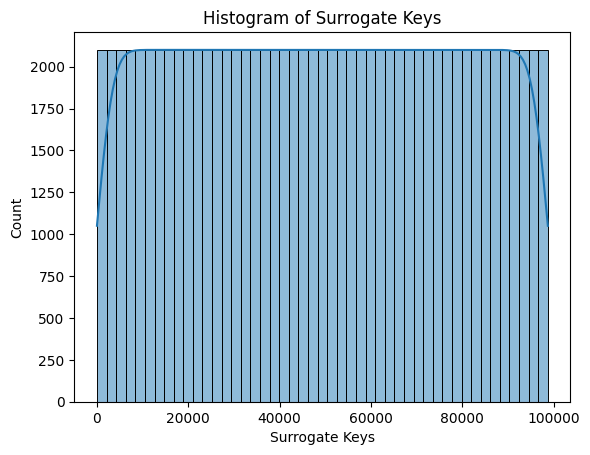

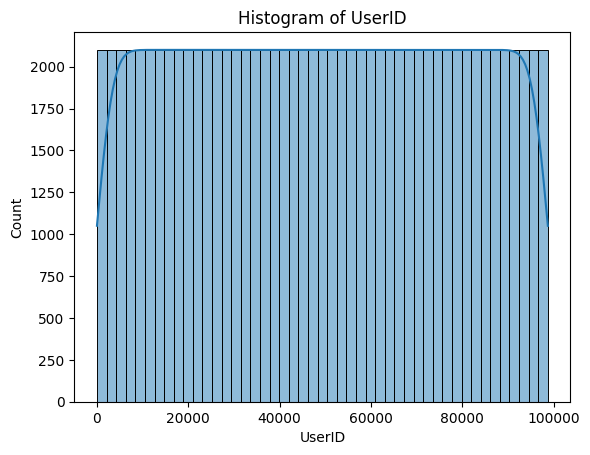

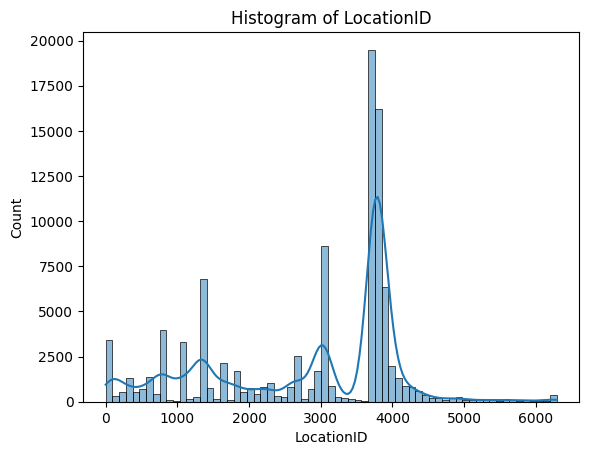

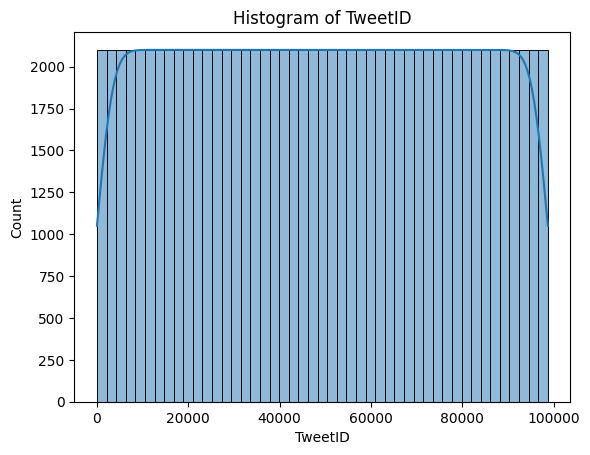

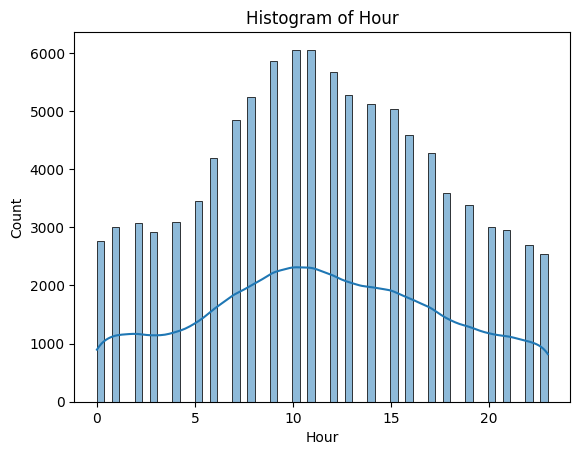

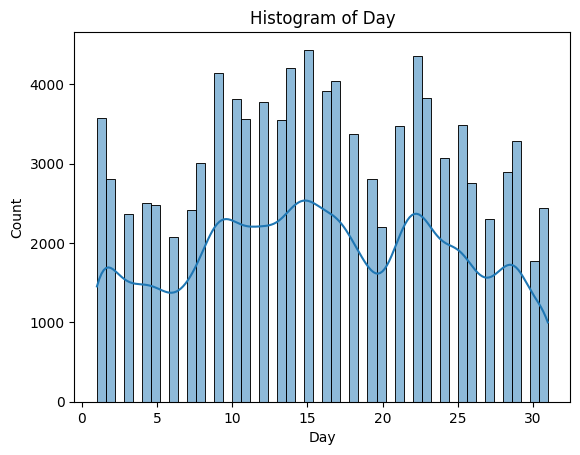

KeyboardInterrupt: 

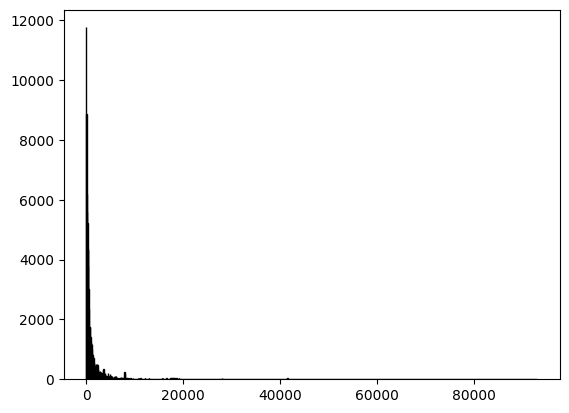

In [34]:

for col in numerical_attributes:
    if (col == 'days_since_request'): 
        continue
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Plot bar plots for each categorical attribute
# Bar plots display the frequency distribution of categorical attributes, which helps identify 
# the most common categories and any imbalances in the data.
# This is useful for understanding the overall composition of the 
# dataset and determining if any categories need further investigation or resampling.

for col in categorical_attributes:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Bar plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

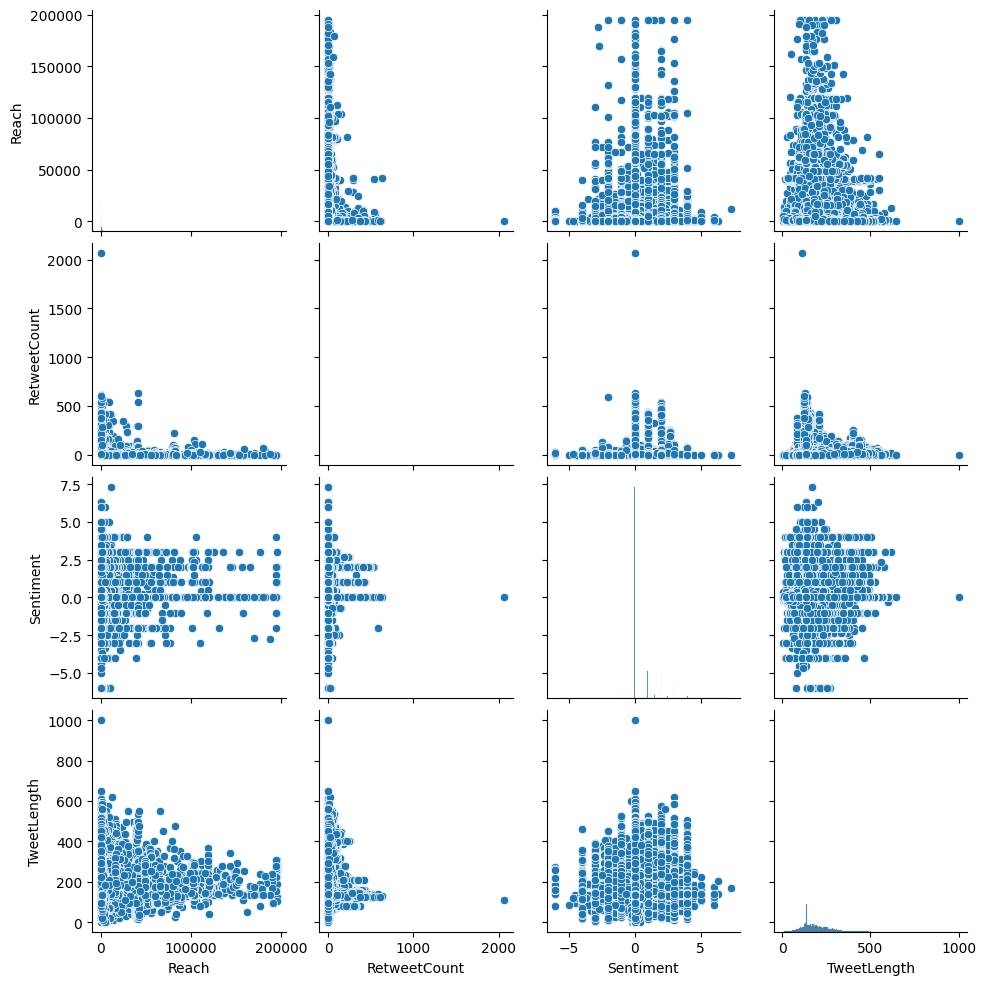

In [7]:
# Plot pair plot for selected attributes
# Pair plots should provide a quick overview of the relationships between pairs of numerical attributes.

selected_attributes = ['Reach', 'RetweetCount', 'Sentiment', 'TweetLength']

sns.pairplot(df[selected_attributes])
plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical columns
ordinal_encoded_data = encoder.fit_transform(categorical_attributes)

# Create a new DataFrame with the transformed columns
encoded_df = pd.DataFrame(ordinal_encoded_data, columns=categorical_attributes.columns, index=df.index)

# Merge the transformed DataFrame with the original DataFrame
df = pd.concat([df.drop(columns=categorical_attributes.columns), encoded_df], axis=1)
print("Data after one-hot encoding:")
print(df.head())





Data after one-hot encoding:
   Surrogate Keys    UserID  LocationID   TweetID      Hour       Day  \
0        0.000000  0.000000    0.000000  0.000000  0.304348  0.366667   
1        0.000010  0.000010    0.000159  0.000010  0.478261  0.200000   
2        0.000020  0.000020    0.000159  0.000020  0.260870  0.366667   
3        0.000030  0.000030    0.000159  0.000030  0.434783  0.366667   
4        0.000041  0.000041    0.000159  0.000041  0.391304  0.666667   

   IsReshare     Reach  RetweetCount     Likes  ...  TweetLength  \
0       True  0.001738      0.061501  0.457129  ...     0.232698   
1      False  0.000446      0.000000  0.065814  ...     0.209629   
2      False  0.000446      0.000000  0.621957  ...     0.244734   
3      False  0.000446      0.000000  0.463429  ...     0.216650   
4      False  0.000436      0.000000  0.096500  ...     0.240722   

   WeekdayIndicator  Gender    City  State  StateCode  Country  Weekday  Lang  \
0              True     3.0  1021.0  321.0

In [15]:
# Normalize numerical attributes using MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = numerical_attributes.columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print part of the result
print("Data after normalization:")
print(df.head())

Data after normalization:
   Surrogate Keys    UserID  LocationID   TweetID      Hour       Day  \
0        0.000000  0.000000    0.000000  0.000000  0.304348  0.366667   
1        0.000010  0.000010    0.000159  0.000010  0.478261  0.200000   
2        0.000020  0.000020    0.000159  0.000020  0.260870  0.366667   
3        0.000030  0.000030    0.000159  0.000030  0.434783  0.366667   
4        0.000041  0.000041    0.000159  0.000041  0.391304  0.666667   

   IsReshare     Reach  RetweetCount     Likes  ...  TweetLength  \
0       True  0.001738      0.061501  0.457129  ...     0.232698   
1      False  0.000446      0.000000  0.065814  ...     0.209629   
2      False  0.000446      0.000000  0.621957  ...     0.244734   
3      False  0.000446      0.000000  0.463429  ...     0.216650   
4      False  0.000436      0.000000  0.096500  ...     0.240722   

   WeekdayIndicator  Gender    City  State  StateCode  Country  Weekday  Lang  \
0              True     3.0  1021.0  321.0   

In [16]:
df_partC = df 

In [21]:
# Separate the target variable from the features
X = df.drop('WeekdayIndicator', axis=1)
y = df['WeekdayIndicator']

# Create an ExtraTreesClassifier object
clf = ExtraTreesClassifier(n_estimators=50)

# Fit the ExtraTreesClassifier to the data
clf.fit(X, y)

# Create a SelectFromModel object using the fitted ExtraTreesClassifier
sfm = SelectFromModel(clf, prefit=True)

# Use the SelectFromModel object to transform the feature matrix
X_selected = sfm.transform(X)

# Print the shape of the original and selected feature matrices
print("Original shape:", X.shape)
print("Selected shape:", X_selected.shape)


Original shape: (98703, 23)
Selected shape: (98703, 2)


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [26]:
print(X_selected)

[[0.36666667 0.        ]
 [0.2        4.        ]
 [0.36666667 5.        ]
 ...
 [0.46666667 5.        ]
 [0.03333333 6.        ]
 [0.66666667 3.        ]]


In [27]:
# Get a boolean mask of the selected features
selected_mask = sfm.get_support()

# Get the names of the selected columns
selected_columns = X.columns[selected_mask]

# Get the names of the dropped columns
dropped_columns = X.columns[~selected_mask]

# Print the names of the dropped columns
print("Dropped columns:", dropped_columns)

Dropped columns: Index(['Surrogate Keys', 'UserID', 'LocationID', 'TweetID', 'Hour',
       'IsReshare', 'Reach', 'RetweetCount', 'Likes', 'Klout', 'Sentiment',
       'DateID', 'LanguageID', 'TweetLength', 'Gender', 'City', 'State',
       'StateCode', 'Country', 'Lang', 'text'],
      dtype='object')


In [28]:
# Get a boolean mask of the selected features
selected_mask = sfm.get_support()

# Get the names of the selected columns
selected_columns = X.columns[selected_mask]

# Print the names of the selected columns
print("Selected columns:", selected_columns)

Selected columns: Index(['Day', 'Weekday'], dtype='object')


In [35]:
# Separate the target variable from the features
X2 = df.drop('WeekdayIndicator', axis=1)
y2 = df['WeekdayIndicator']

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X2, y2)
model = SelectFromModel(lsvc, prefit=True)
X2_selected = model.transform(X2)

# Print the shape of the original and selected feature matrices
print("Original shape:", X2.shape)
print("Selected shape:", X2_selected.shape)

Original shape: (98703, 23)
Selected shape: (98703, 16)


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [36]:
start_time = time.time() # Record start time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.34, random_state=42)

# Create a Decision Tree classifier object
dt = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))


Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4938
        True       1.00      1.00      1.00     28622

    accuracy                           1.00     33560
   macro avg       1.00      1.00      1.00     33560
weighted avg       1.00      1.00      1.00     33560

Time taken: 0 minutes and 0 seconds


In [37]:
start_time = time.time() # Record start time

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_selected, y2, test_size=0.34, random_state=42)

# Create a Decision Tree classifier object
dt = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt.fit(X2_train, y2_train)

# Make predictions on the test data
y2_pred = dt.predict(X2_test)

end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4938
        True       1.00      1.00      1.00     28622

    accuracy                           1.00     33560
   macro avg       1.00      1.00      1.00     33560
weighted avg       1.00      1.00      1.00     33560

Time taken: 0 minutes and 0 seconds


In [38]:
start_time = time.time() # Record start time

# Split data into training and testing 
X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y2, test_size=0.34,random_state=42)

# Create a GradientBoostingClassifier object 
model = GradientBoostingClassifier()
model.fit(X3_train, y3_train) # Train the data on the model 

y3_pred = model.predict(X3_test) #Make predictions on the test data 
end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
accuracy = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy)
print(classification_report(y3_test, y3_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4938
        True       1.00      1.00      1.00     28622

    accuracy                           1.00     33560
   macro avg       1.00      1.00      1.00     33560
weighted avg       1.00      1.00      1.00     33560

Time taken: 0 minutes and 35 seconds


In [39]:
start_time = time.time() # Record start time

# Split data into training and testing 
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.34,random_state=42)

# Create a GradientBoostingClassifier object 
model = GradientBoostingClassifier()
model.fit(X4_train, y4_train) # Train the data on the model 

y4_pred = model.predict(X4_test) #Make predictions on the test data 
end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
accuracy = accuracy_score(y4_test, y4_pred)
print("Accuracy:", accuracy)
print(classification_report(y4_test, y4_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4938
        True       1.00      1.00      1.00     28622

    accuracy                           1.00     33560
   macro avg       1.00      1.00      1.00     33560
weighted avg       1.00      1.00      1.00     33560

Time taken: 0 minutes and 36 seconds


In [40]:
start_time = time.time() # Record start time

# Split the dataset into training and test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X2, y2, test_size=0.34,random_state=42)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf.fit(X5_train, y5_train)

# Predict the labels of the test set
y5_pred = rf.predict(X5_test)

end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
accuracy = accuracy_score(y5_test, y5_pred)
print("Accuracy:", accuracy)
print(classification_report(y5_test, y5_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))


Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4938
        True       1.00      1.00      1.00     28622

    accuracy                           1.00     33560
   macro avg       1.00      1.00      1.00     33560
weighted avg       1.00      1.00      1.00     33560

Time taken: 0 minutes and 19 seconds


In [41]:
start_time = time.time() # Record start time

# Split the dataset into training and test sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X, y, test_size=0.34,random_state=42)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf.fit(X6_train, y6_train)

# Predict the labels of the test set
y6_pred = rf.predict(X6_test)

end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
accuracy = accuracy_score(y6_test, y6_pred)
print("Accuracy:", accuracy)
print(classification_report(y6_test, y6_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4938
        True       1.00      1.00      1.00     28622

    accuracy                           1.00     33560
   macro avg       1.00      1.00      1.00     33560
weighted avg       1.00      1.00      1.00     33560

Time taken: 0 minutes and 20 seconds


In [42]:
# Decision Trees
# Tree-based feature selection
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Decision Trees using Tree-based :")
print(cm1)

#L1-based feature selection
cm2 = confusion_matrix(y2_test, y2_pred)
print("Confusion matrix for Decision Trees using L1-based :")
print(cm2)

# Gradient Boosting
# Tree-based feature selection
cm3 = confusion_matrix(y4_test, y4_pred)
print("Confusion matrix for Gradient Boosting using Tree-based :")
print(cm3)

#L1-based feature selection
cm4 = confusion_matrix(y3_test, y3_pred)
print("Confusion matrix for Gradient Boosting using L1-based :")
print(cm4)

# Random Forest algorithms 
# Tree-based Feature selection
cm5 = confusion_matrix(y6_test, y6_pred)
print("Confusion matrix for RandomForest Algorithms using tree-based:")
print(cm5)

#L1-based feature selection
cm6 = confusion_matrix(y5_test, y5_pred)
print("Confusion matrix for RandomForest Algorithms using L1-based :")
print(cm6)


Confusion matrix for Decision Trees using Tree-based :
[[ 4938     0]
 [    0 28622]]
Confusion matrix for Decision Trees using L1-based :
[[ 4938     0]
 [    0 28622]]
Confusion matrix for Gradient Boosting using Tree-based :
[[ 4938     0]
 [    0 28622]]
Confusion matrix for Gradient Boosting using L1-based :
[[ 4938     0]
 [    0 28622]]
Confusion matrix for RandomForest Algorithms using tree-based:
[[ 4938     0]
 [    0 28622]]
Confusion matrix for RandomForest Algorithms using L1-based :
[[ 4938     0]
 [    0 28622]]


In [43]:
print(df_partC.head())

   Surrogate Keys    UserID  LocationID   TweetID      Hour       Day  \
0        0.000000  0.000000    0.000000  0.000000  0.304348  0.366667   
1        0.000010  0.000010    0.000159  0.000010  0.478261  0.200000   
2        0.000020  0.000020    0.000159  0.000020  0.260870  0.366667   
3        0.000030  0.000030    0.000159  0.000030  0.434783  0.366667   
4        0.000041  0.000041    0.000159  0.000041  0.391304  0.666667   

   IsReshare     Reach  RetweetCount     Likes  ...  TweetLength  \
0       True  0.001738      0.061501  0.457129  ...     0.232698   
1      False  0.000446      0.000000  0.065814  ...     0.209629   
2      False  0.000446      0.000000  0.621957  ...     0.244734   
3      False  0.000446      0.000000  0.463429  ...     0.216650   
4      False  0.000436      0.000000  0.096500  ...     0.240722   

   WeekdayIndicator  Gender    City  State  StateCode  Country  Weekday  Lang  \
0              True     3.0  1021.0  321.0        1.0      0.0      0.0

In [ ]:
# Train the OneClassSVM model
# You can adjust the nu and kernel parameters as needed
start_time = time.time() # Record start time
print("Starting")
ocsvm = OneClassSVM(nu=0.1, kernel='linear', gamma='scale')
print("Model initialized")
ocsvm.fit(df_partC)
print("Fit completed")

# Predict the outliers
outlier_predictions = ocsvm.predict(df_partC)
print("Predictions completed")
# Add outlier predictions to the DataFrame
df_partC['Outlier'] = outlier_predictions
end_time = time.time() # Record end time 

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))
# Print the DataFrame with the detected outliers
# Outliers are marked as -1, and inliers are marked as 1
print(df_partC)

Starting
Model initialized
